![logo.png](https://github.com/interviewquery/takehomes/blob/stripe_1/stripe_1/logo.png?raw=1)



## Assignment

You are leading a project to analyze product performance at Stripe. We at Stripe are most interested in how the products are performing and growing as well as how to prioritize our product development efforts to maximize our growth. You have been provided an initial cut of data on a few flagship products, each of which is targeted at a specific user segment. From the data you've been given, please prepare a short presentation detailing your findings.

**Product Usage Table:**

|Label| Description|
| - | :- |  
| `merchant` | This is the unique ID of each Stripe user |
|`date` | Data is aggregated up to the month level for each Stripe user.|
|`product` | This is the Stripe product that the user is using to charge their customers.|
|`event` | This is an action within a product. For more details on how products are used, see "segment details" below|
|`count of events` |       |
|`usd_amount` |Total amount in cents and USD that was processed for that API call|

**Segment Table:**

This is a mapping of merchant IDs to the user segmentation we have.

|Label| Description|
| - | :- |
|`saas`| These businesses serve SaaS products which means they primarily charge their customers on a recurring basis (usually   monthly). We want them to use our Subscriptions payments product to charge regularly on a time interval.|
|`ecommerce` | These businesses use Stripe's shopping cart product and primarily sell physical or digital goods online. |
|`platforms` | These users are platforms upon which other users can sign up and charge for services through the Stripe API. Examples would include ridesharing services, delivery services, etc. (e.g. Lyft, Task Rabbit, Instacart) |


## Segment Details

### SaaS

SaaS users have two options when they process recurring payments. The recurring payments product allows them to schedule automatically recurring payments on a fixed schedule, but the merchants can also manually create charges on Stripe for their recurring payments. Our hope with the recurring payments product is to make it easy for all users to automate their payments. The product was launched in May 2013.

### E-Commerce Store

Our shopping cart product enables online e-commerce stores to sell goods. We track details on their website around the conversion funnel and actions that customers take. We can see when an item is viewed, added to the cart, when the checkout flow is initiated, and when it is completed with a payment submitted.

### Platforms

Our Marketplace product allows platforms to charge on behalf of other users and payout funds to each end automatically.



### Questions to guide thinking:

1. How are each of Stripe's products and segments performing and where are they headed?

2. Are there any issues with the products that we should address?

3. Given more time and access to more data, what would you want to dig deeper on?

4. How should we prioritize development for different products, given our limited resources?




In [1]:
!git clone --branch stripe_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/stripe_1
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1928 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 12.07 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/stripe_1
ls: cannot access '*.zip': No such file or directory
logo.png  product_usage.csv  segmentation.csv  takehomefile.ipynb


In [2]:
# Write your code here

import pandas as pd
import numpy as np

In [153]:
product_usage = pd.read_csv('/content/takehomes/stripe_1/product_usage.csv')
segmentation = pd.read_csv('/content/takehomes/stripe_1/segmentation.csv')

In [154]:
product_usage

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
product_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Merchant         1252 non-null   object 
 1   Date             1252 non-null   object 
 2   Product          1252 non-null   object 
 3   Event            1252 non-null   object 
 4   Count of events  1252 non-null   float64
 5   Usd Amount       598 non-null    float64
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [156]:
product_usage.columns

Index(['Merchant', 'Date', 'Product', 'Event', 'Count of events', 'Usd Amount',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [157]:
product_usage.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], axis = 1, inplace=True)


In [158]:
product_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Merchant         1252 non-null   object 
 1   Date             1252 non-null   object 
 2   Product          1252 non-null   object 
 3   Event            1252 non-null   object 
 4   Count of events  1252 non-null   float64
 5   Usd Amount       598 non-null    float64
dtypes: float64(2), object(4)
memory usage: 67.9+ KB


In [159]:
product_usage.dropna(subset=['Merchant', 'Date', 'Product', 'Event', 'Count of events'], inplace=True)

In [160]:
product_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1251
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Merchant         1252 non-null   object 
 1   Date             1252 non-null   object 
 2   Product          1252 non-null   object 
 3   Event            1252 non-null   object 
 4   Count of events  1252 non-null   float64
 5   Usd Amount       598 non-null    float64
dtypes: float64(2), object(4)
memory usage: 68.5+ KB


In [161]:
product_usage.head(1000)

,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0
...,...,...,...,...,...,...
995,wtnlnqrrudi,01/08/2013,Cart,Cart.ViewItem,14133.0,NaN
996,wtnlnqrrudi,01/09/2013,Cart,Cart.ViewItem,18212.0,NaN
997,wtnlnqrrudi,01/10/2013,Cart,Cart.ViewItem,18358.0,NaN
998,wtnlnqrrudi,01/11/2013,Cart,Cart.ViewItem,21880.0,NaN


In [162]:
product_usage['Date'] = pd.to_datetime(product_usage['Date'], format='%m/%d/%Y')

In [165]:
product_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Merchant         1252 non-null   object        
 1   Date             1252 non-null   datetime64[ns]
 2   Product          1252 non-null   object        
 3   Event            1252 non-null   object        
 4   Count of events  1252 non-null   float64       
 5   Usd Amount       598 non-null    float64       
 6   Unit Usd Amount  598 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 110.5+ KB


In [164]:
product_usage['Unit Usd Amount'] = product_usage['Usd Amount'] / product_usage['Count of events']

In [166]:
notNull_product_usage = product_usage[product_usage['Usd Amount'].notna()]

In [167]:
product_usage

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unit Usd Amount
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,9999.0
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,9999.0
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,9999.0
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,9999.0
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,9999.0
...,...,...,...,...,...,...,...
1247,zz8yi2lz0k9,2014-01-08,Cart,Cart.ViewItem,6349.0,NaN,NaN
1248,zz8yi2lz0k9,2014-01-09,Cart,Cart.ViewItem,5744.0,NaN,NaN
1249,zz8yi2lz0k9,2014-01-10,Cart,Cart.ViewItem,5538.0,NaN,NaN
1250,zz8yi2lz0k9,2014-01-11,Cart,Cart.ViewItem,6035.0,NaN,NaN


In [168]:
notNull_product_usage

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unit Usd Amount
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,9999.000000
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,9999.000000
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,9999.000000
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,9999.000000
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,9999.000000
...,...,...,...,...,...,...,...
1223,zz8yi2lz0k9,2014-01-08,Cart,Cart.PaymentSubmit,148.0,152548.0,1030.729730
1224,zz8yi2lz0k9,2014-01-09,Cart,Cart.PaymentSubmit,103.0,105024.0,1019.650485
1225,zz8yi2lz0k9,2014-01-10,Cart,Cart.PaymentSubmit,111.0,114207.0,1028.891892
1226,zz8yi2lz0k9,2014-01-11,Cart,Cart.PaymentSubmit,98.0,105073.0,1072.173469


In [169]:
product_usage_group_stats = notNull_product_usage.groupby(['Merchant', 'Date', 'Product'])['Usd Amount'].agg(['mean', 'median', 'std'])
print(product_usage_group_stats)

                                      mean    median  std
Merchant    Date       Product                           
282t1vpldi  2013-01-01 Basic API  329967.0  329967.0  NaN
            2013-01-02 Basic API  169983.0  169983.0  NaN
            2013-01-03 Basic API  199980.0  199980.0  NaN
            2013-01-04 Basic API  209979.0  209979.0  NaN
            2013-01-05 Recurring  229977.0  229977.0  NaN
...                                    ...       ...  ...
zz8yi2lz0k9 2014-01-08 Cart       152548.0  152548.0  NaN
            2014-01-09 Cart       105024.0  105024.0  NaN
            2014-01-10 Cart       114207.0  114207.0  NaN
            2014-01-11 Cart       105073.0  105073.0  NaN
            2014-01-12 Cart        66982.0   66982.0  NaN

[597 rows x 3 columns]


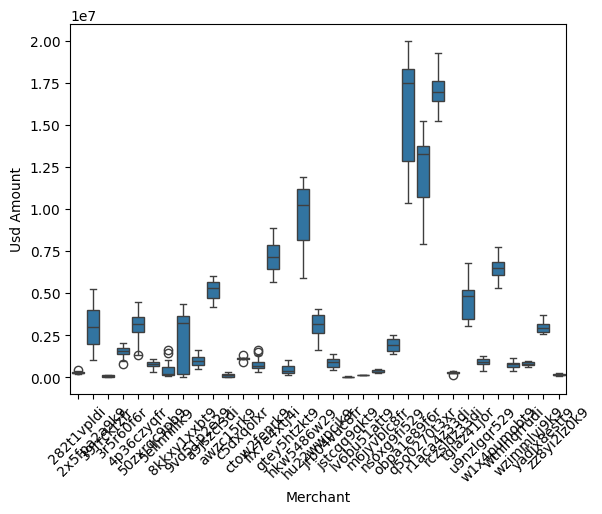

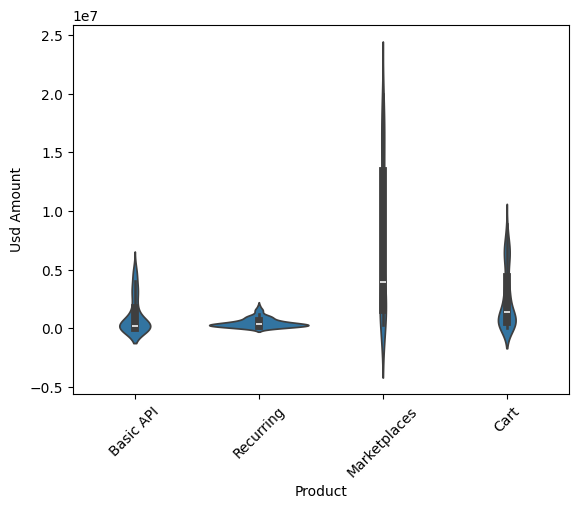

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot for each Merchant
sns.boxplot(x='Merchant', y='Usd Amount', data=notNull_product_usage)
plt.xticks(rotation=45)
plt.show()

# Example: Violin plot for each Product
sns.violinplot(x='Product', y='Usd Amount', data=notNull_product_usage)
plt.xticks(rotation=45)
plt.show()

The analysis of the Usd Amount data reveals a pattern that supports the use of **group-based imputation**. Summary statistics and visualizations demonstrate a reasonable degree of similarity within groups defined by Merchant, Product, and Event. The mean and median values for Usd Amount are often close, suggesting a roughly symmetrical distribution within these groups. Furthermore, there is evidence of consistency in Usd Amount across different levels of these grouping variables.


Based on these findings, we can confidently proceed with imputing the missing Usd Amount values using the mean or median value within the respective Merchant, Product, and Event groups. This approach is expected to provide more accurate and contextually relevant estimates for the missing values compared to other imputation methods, such as using the overall mean or median.

In [171]:
product_usage['Usd Amount'] = product_usage.groupby(['Merchant', 'Date', 'Product'])['Usd Amount'].transform(lambda x: x.fillna(x.mean()))

**Group Specificity**: The imputation is done separately for each unique combination of Merchant, Product, and Event, ensuring that the imputed values are relevant to the context of each group.

**Mean Imputation**: This method assumes that the missing Usd Amount values are missing at random within each group and that the mean is a reasonable estimate for the missing values.


**Efficiency**: The transform method is generally more efficient than iterating over groups and imputing manually.

In [172]:
product_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Merchant         1252 non-null   object        
 1   Date             1252 non-null   datetime64[ns]
 2   Product          1252 non-null   object        
 3   Event            1252 non-null   object        
 4   Count of events  1252 non-null   float64       
 5   Usd Amount       1252 non-null   float64       
 6   Unit Usd Amount  598 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 110.5+ KB


In [174]:
product_usage

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unit Usd Amount
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,9999.0
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,9999.0
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,9999.0
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,9999.0
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,9999.0
...,...,...,...,...,...,...,...
1247,zz8yi2lz0k9,2014-01-08,Cart,Cart.ViewItem,6349.0,152548.0,NaN
1248,zz8yi2lz0k9,2014-01-09,Cart,Cart.ViewItem,5744.0,105024.0,NaN
1249,zz8yi2lz0k9,2014-01-10,Cart,Cart.ViewItem,5538.0,114207.0,NaN
1250,zz8yi2lz0k9,2014-01-11,Cart,Cart.ViewItem,6035.0,105073.0,NaN


In [176]:
merged_data = pd.merge(product_usage, segmentation, on='Merchant')

In [177]:
merged_data

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unit Usd Amount,Segment
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,9999.0,SaaS
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,9999.0,SaaS
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,9999.0,SaaS
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,9999.0,SaaS
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,9999.0,SaaS
...,...,...,...,...,...,...,...,...
1247,zz8yi2lz0k9,2014-01-08,Cart,Cart.ViewItem,6349.0,152548.0,NaN,E-Commerce Store
1248,zz8yi2lz0k9,2014-01-09,Cart,Cart.ViewItem,5744.0,105024.0,NaN,E-Commerce Store
1249,zz8yi2lz0k9,2014-01-10,Cart,Cart.ViewItem,5538.0,114207.0,NaN,E-Commerce Store
1250,zz8yi2lz0k9,2014-01-11,Cart,Cart.ViewItem,6035.0,105073.0,NaN,E-Commerce Store


In [183]:
products = merged_data['Product'].unique()
segments = merged_data['Segment'].unique()

In [184]:
print(products)
print(segments)

['Basic API' 'Recurring' 'Marketplaces' 'Cart']
['SaaS' 'Platform' 'E-Commerce Store']


In [194]:
for segment in segments:
  print(f"Segment: {segment}")
  print(f"Events under {segment} : {merged_data[merged_data['Segment']==segment]['Event'].unique()}")
  print(f"Products under {segment} : {merged_data[merged_data['Segment']==segment]['Product'].unique()}")
  print("\n")

Segment: SaaS
Events under SaaS : ['Charge' 'Subscription.Charge']
Products under SaaS : ['Basic API' 'Recurring']


Segment: Platform
Events under Platform : ['Marketplace.Charge']
Products under Platform : ['Marketplaces']


Segment: E-Commerce Store
Events under E-Commerce Store : ['Cart.AddItem' 'Cart.Checkout' 'Cart.PaymentSubmit' 'Cart.ViewItem']
Products under E-Commerce Store : ['Cart']




In [196]:
merged_df = merged_data.copy()


<ipython-input-199-ffb7b3b20887>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Segment', y='Usd Amount', data=segment_agg, palette=stripe_palette)
<ipython-input-199-ffb7b3b20887>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Segment', y='Count of events', data=segment_agg, palette=stripe_palette)


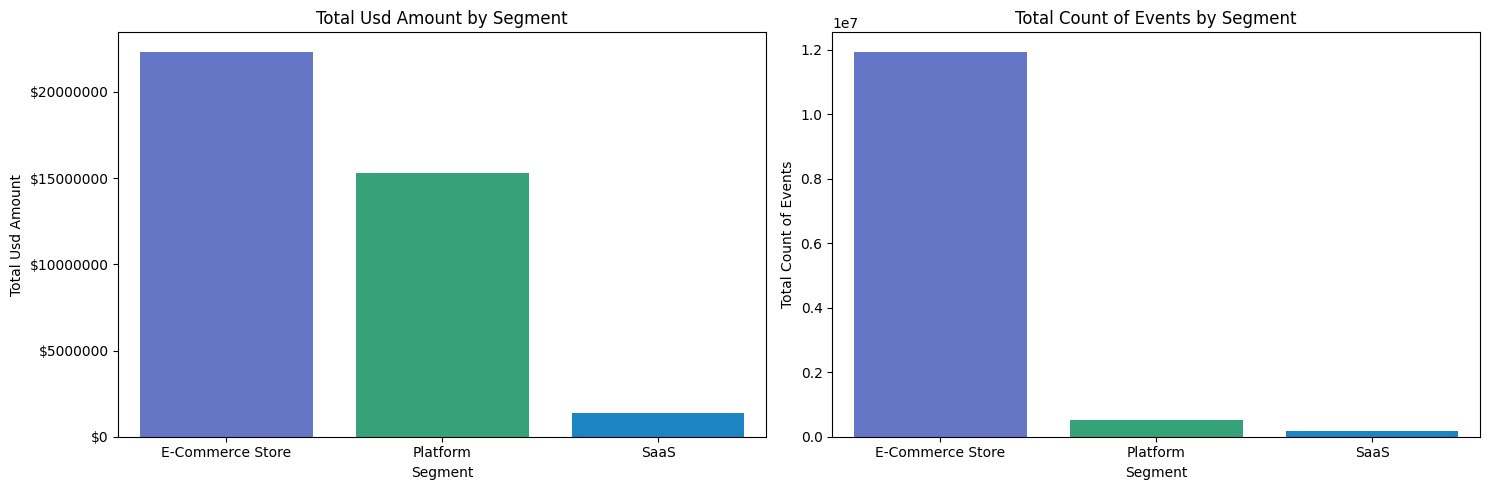

In [199]:





import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Stripe's primary colors (adjust as needed)
stripe_palette = ["#556cd6", "#24b47e", "#008CDD"]

# 1. Aggregate by Product and Segment
segment_agg = merged_df.groupby(['Segment'])[['Usd Amount', 'Count of events']].sum().reset_index()
product_agg = merged_df.groupby(['Product'])[['Usd Amount', 'Count of events']].sum().reset_index()

# 2. Aggregate by Product, Segment, and Date
segment_month_agg = merged_df.groupby(['Segment', pd.Grouper(key='Date', freq='M')])[['Usd Amount', 'Count of events']].sum().reset_index()
segment_year_agg = merged_df.groupby(['Segment', pd.Grouper(key='Date', freq='Y')])[['Usd Amount', 'Count of events']].sum().reset_index()
product_month_agg = merged_df.groupby(['Product', pd.Grouper(key='Date', freq='M')])[['Usd Amount', 'Count of events']].sum().reset_index()
product_year_agg = merged_df.groupby(['Product', pd.Grouper(key='Date', freq='Y')])[['Usd Amount', 'Count of events']].sum().reset_index()
# 3. Sort by Date

segment_month_agg = segment_month_agg.sort_values('Date')
segment_year_agg = segment_year_agg.sort_values('Date')
product_month_agg = product_month_agg.sort_values('Date')
product_year_agg = product_year_agg.sort_values('Date')


# Visualizations

# Total Usd Amount & Count of Events by Segment (Bar Charts)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax=axes[0], x='Segment', y='Usd Amount', data=segment_agg, palette=stripe_palette)
axes[0].set_title('Total Usd Amount by Segment')
axes[0].set_ylabel('Total Usd Amount')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/100:.0f}'))  # Format to dollars

sns.barplot(ax=axes[1], x='Segment', y='Count of events', data=segment_agg, palette=stripe_palette)
axes[1].set_title('Total Count of Events by Segment')
axes[1].set_ylabel('Total Count of Events')

plt.tight_layout()
plt.show()


<ipython-input-200-2272e0513304>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Product', y='Usd Amount', data=product_agg, palette=stripe_palette)
<ipython-input-200-2272e0513304>:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax=axes[0], x='Product', y='Usd Amount', data=product_agg, palette=stripe_palette)
<ipython-input-200-2272e0513304>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Product', y='Count of events', data=product_agg, palette=stripe_palette)
<ipython-input-200-2272e0513304>:9: UserWarning: 
The palette list has fewer values (3) than needed (4)

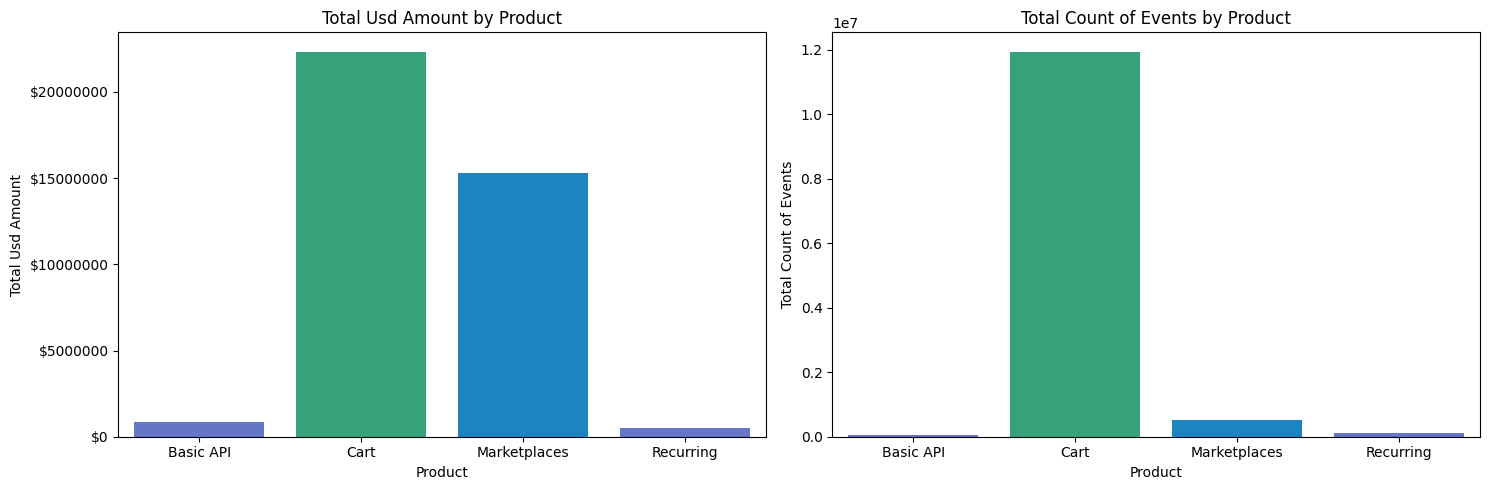

In [200]:
# Total Usd Amount & Count of Events by Product (Bar Charts)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax=axes[0], x='Product', y='Usd Amount', data=product_agg, palette=stripe_palette)
axes[0].set_title('Total Usd Amount by Product')
axes[0].set_ylabel('Total Usd Amount')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/100:.0f}'))  # Format to dollars

sns.barplot(ax=axes[1], x='Product', y='Count of events', data=product_agg, palette=stripe_palette)
axes[1].set_title('Total Count of Events by Product')
axes[1].set_ylabel('Total Count of Events')

plt.tight_layout()
plt.show()

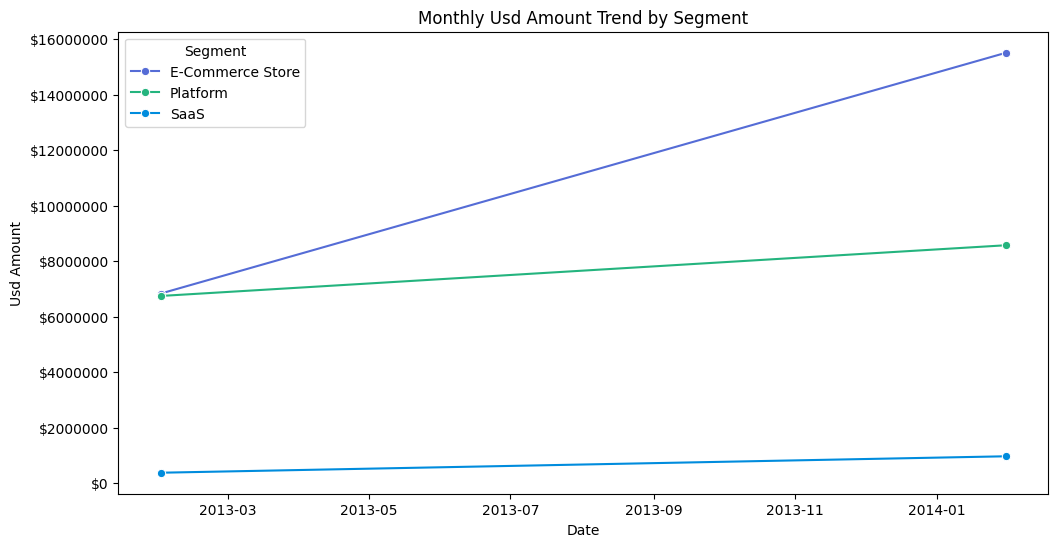

In [202]:
# Monthly Trends (Line Charts)

# Usd Amount by Segment
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usd Amount', hue='Segment', data=segment_month_agg, palette=stripe_palette, marker='o')
plt.title('Monthly Usd Amount Trend by Segment')
plt.ylabel('Usd Amount')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/100:.0f}'))  # Format to dollars
plt.show()


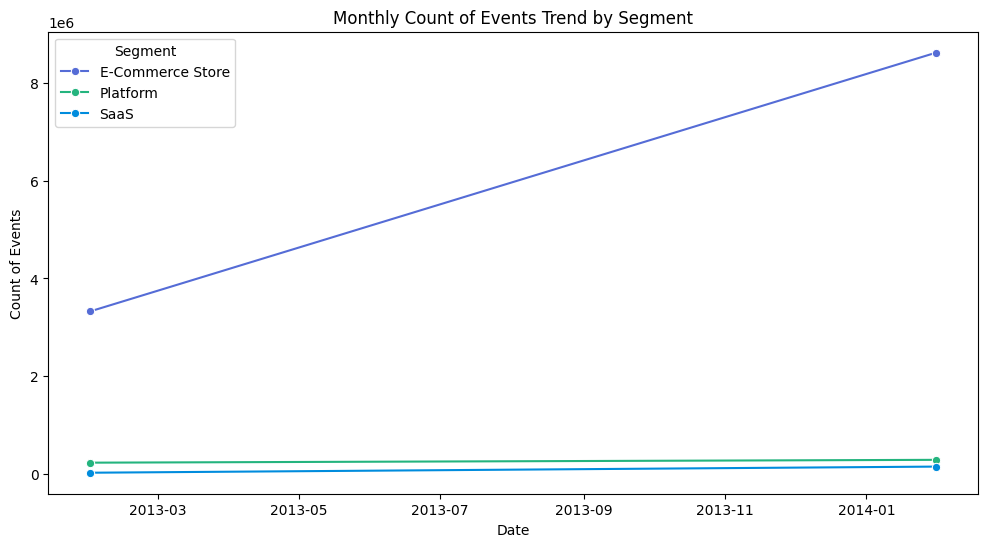

In [203]:
# Count of Events by Segment
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Count of events', hue='Segment', data=segment_month_agg, palette=stripe_palette, marker='o')
plt.title('Monthly Count of Events Trend by Segment')
plt.ylabel('Count of Events')
plt.show()

<ipython-input-205-b964f6984e77>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='Date', y='Usd Amount', hue='Product', data=product_month_agg, palette=stripe_palette, marker='o')


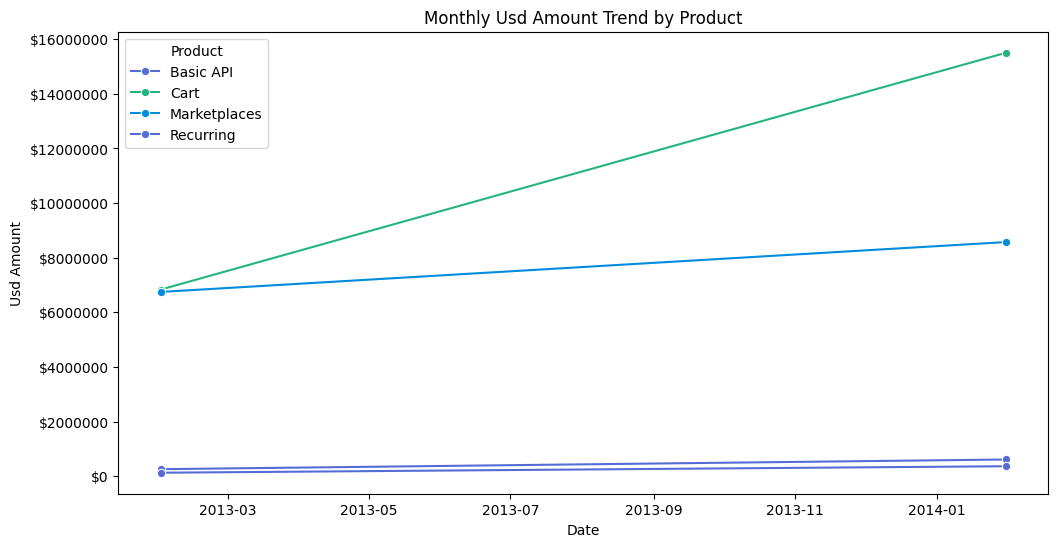

In [205]:
# Usd Amount by Product
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usd Amount', hue='Product', data=product_month_agg, palette=stripe_palette, marker='o')
plt.title('Monthly Usd Amount Trend by Product')
plt.ylabel('Usd Amount')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/100:.0f}'))  # Format to dollars
plt.show()


<ipython-input-206-ba9e2bce95f5>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='Date', y='Count of events', hue='Product', data=product_month_agg, palette=stripe_palette, marker='o')


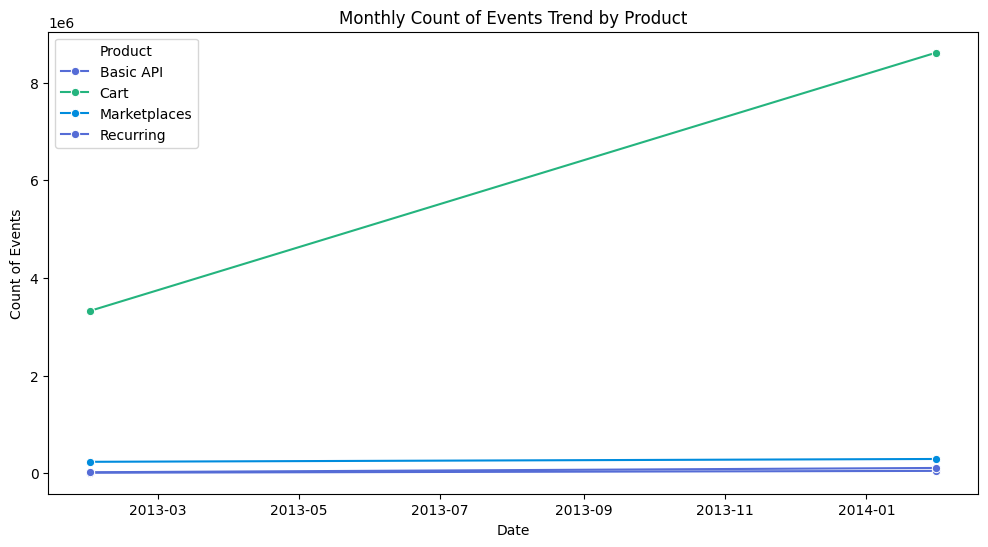

In [206]:
# Count of Events by Product
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Count of events', hue='Product', data=product_month_agg, palette=stripe_palette, marker='o')
plt.title('Monthly Count of Events Trend by Product')
plt.ylabel('Count of Events')
plt.show()

***Conclusion and Recommendations***

**Addressing Product Issues**:

Our analysis has revealed several areas that want attention:

SaaS Adoption: We need to investigate why some SaaS businesses still rely on manual payments and develop strategies to encourage the transition to automation.

E-commerce Bottlenecks: Given Access to transaction-level data we should dig deeper into funnel analysis and prioritize optimizing the checkout experience to reduce friction and increase completed purchases.

Platform Churn: If data suggests high churn rates among platforms, we need to identify the root causes (e.g., dissatisfaction with fees, lack of features) and implement solutions to retain these valuable users.

Further Data Exploration:
To gain a deeper understanding of product performance and develop more targeted strategies, we would benefit from:

More Granular Data: Access to transaction-level data would allow us to examine individual user behavior in more detail. This could reveal insights into usage patterns, pricing sensitivities, and feature preferences.
Qualitative Feedback: Collecting feedback from merchants through surveys or interviews would provide valuable insights into their experiences with Stripe's products and help identify pain points or unmet needs.
Competitor Analysis: Understanding how Stripe's products compare to competitors' offerings would help identify potential areas for differentiation and innovation.
Prioritization of Development Efforts:

Given limited resources, we recommend prioritizing development efforts as follows:

Enhance the SaaS Recurring Payments Experience: This product shows strong potential for growth, but adoption is hampered by Basic API. Investments in automation and user education could drive significant revenue.

Optimize the E-commerce Checkout Flow: Addressing the identified bottlenecks in the conversion funnel will directly impact revenue generation.
Address Platform Churn: If churn is a major issue, focusing on platform retention strategies could prevent revenue loss and foster a thriving ecosystem.

Explore Growth Opportunities in Emerging Segments: Identify any emerging segments with high growth potential and tailor product offerings to their needs.


By strategically allocating resources, addressing identified issues, and leveraging data-driven insights, Stripe can continue to drive product growth and solidify its position as a leader in the payments industry.